# Fiber Photometry Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from utils_1 import scale
# import scipy.signal as sig
# from scipy.interpolate import interp1d

In [5]:
def load_traces(file_path):
    return pd.read_csv(file_path)

def scale(data):
    return (data - data.min()) / (data.max()-data.min()) # rescale data to be between 0 and 1

def scale(data):
    return (data - data.mean()) / data.std() # Z-score normalization: mean 0, std 1

In [6]:
file = '/Users/katezhang/Desktop/PSL498/Fiber photometry traces/ADF8_m4.csv'  # Update the path as needed
# df = pd.read_csv(file)
traces = load_traces(file)
traces = traces.query("LedState==1")
traces

,FrameCounter,Timestamp,LedState,Region0G,Region1R
1,1,5925.566208,1,0.243512,0.115678
3,3,5925.599520,1,0.243066,0.115538
5,5,5925.632864,1,0.240791,0.113633
7,7,5925.666208,1,0.240666,0.113527
9,9,5925.699520,1,0.240409,0.113581
...,...,...,...,...,...
18819,18819,6239.185408,1,0.245690,0.118606
18821,18821,6239.218752,1,0.245871,0.118552
18823,18823,6239.252096,1,0.245774,0.118590
18825,18825,6239.285408,1,0.245661,0.118623


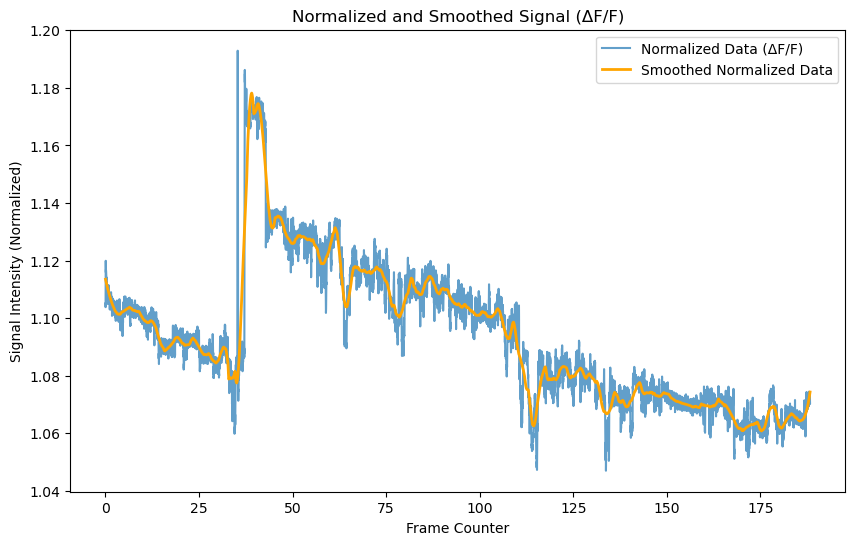

Area Under the Curve (AUC) of Smoothed Normalized Data: 205.92276425783925


In [9]:
reference_signal = traces["Region1R"]  # Assuming this is the reference signal
interest_signal = traces["Region0G"]  # Assuming this is the signal of interest
normalized_data = (interest_signal-reference_signal) / reference_signal
smoothed_data = savgol_filter(normalized_data, window_length=250, polyorder=3)

# clean up the x axis
traces['FrameCounter'] = traces['FrameCounter'] / 100
plt.figure(figsize=(10, 6))

# Plot normalized data
plt.plot(traces['FrameCounter'], normalized_data, label='Normalized Data (ΔF/F)', alpha=0.7)

# Plot smoothed normalized data
plt.plot(traces['FrameCounter'], smoothed_data, label='Smoothed Normalized Data', color='orange', linewidth=2)

plt.xlabel('Frame Counter')
plt.ylabel('Signal Intensity (Normalized)')
plt.title('Normalized and Smoothed Signal (ΔF/F)')
plt.legend()
plt.show()

# Calculate the Area Under the Curve (AUC) using the trapezoidal rule
auc_smoothed_data = np.trapz(smoothed_data, traces['FrameCounter'])

# Print the AUC result
print(f"Area Under the Curve (AUC) of Smoothed Normalized Data: {auc_smoothed_data}")

# select area to calculate AUC, given time 

In [8]:
def calculate_auc_in_range(frame_counter, signal, start_time, end_time):
    # Filter the data to the time range
    mask = (frame_counter >= start_time) & (frame_counter <= end_time)
    filtered_frames = frame_counter[mask]
    filtered_signal = signal[mask]
    
    # Calculate AUC using the trapezoidal rule for the filtered range
    auc = np.trapz(filtered_signal, filtered_frames)
    
    return auc

In [11]:
# Define your start and end frame counters
start_time = 50  # Replace with your start frame counter
end_time = 100   # Replace with your end frame counter

# Mask the smoothed data to include only the selected range
mask = (traces['FrameCounter'] >= start_frame) & (traces['FrameCounter'] <= end_frame)
selected_x = traces['FrameCounter'][mask]  # Filtered x-axis values
selected_y = smoothed_data[mask]           # Filtered y-axis values

# Calculate the AUC using the trapezoidal rule for the selected range
auc_selected_range = np.trapz(selected_y, selected_x)

# Print the AUC result for the selected range
print(f"AUC for the range {start_frame}-{end_frame}: {auc_selected_range}")


AUC for the range 50-100: 55.660016860237405


In [4]:
calculate_auc_in_range(frame_counter, signal, start_time, end_time)

NameError: name 'frame_counter' is not defined

## Smoothing the curves

In [3]:
# Apply a rolling average (window size of 10) to smooth the Region0G and Region1R data
df['Region0G_smooth'] = df['Region0G'].rolling(window=10, center=True).mean()
df['Region1R_smooth'] = df['Region1R'].rolling(window=10, center=True).mean()

## Plotting the original and smoothed signals

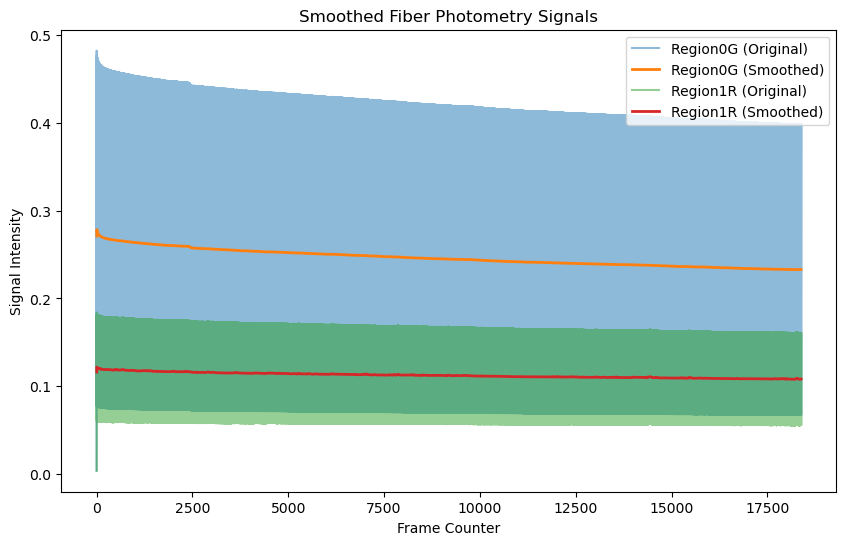

In [4]:
# Plot the original and smoothed signals for Region0G and Region1R
plt.figure(figsize=(10,6))
plt.plot(df['FrameCounter'], df['Region0G'], label='Region0G (Original)', alpha=0.5)
plt.plot(df['FrameCounter'], df['Region0G_smooth'], label='Region0G (Smoothed)', linewidth=2)
plt.plot(df['FrameCounter'], df['Region1R'], label='Region1R (Original)', alpha=0.5)
plt.plot(df['FrameCounter'], df['Region1R_smooth'], label='Region1R (Smoothed)', linewidth=2)
plt.xlabel('Frame Counter')
plt.ylabel('Signal Intensity')
plt.title('Smoothed Fiber Photometry Signals')
plt.legend()
plt.show()

## Calculating the Area Under the Curve (AUC)

In [5]:
# Calculate AUC using the trapezoidal rule
auc_region0g = np.trapz(df['Region0G_smooth'].dropna(), df['FrameCounter'].iloc[df['Region0G_smooth'].dropna().index])
auc_region1r = np.trapz(df['Region1R_smooth'].dropna(), df['FrameCounter'].iloc[df['Region1R_smooth'].dropna().index])

# Display the AUC results
auc_region0g, auc_region1r

(4525.0136454390695, 2067.8714387660075)